In [3]:
import numpy as np

def wqy_sigmoid(x):
    s=1.0/(1+1/np.exp(x))
    return s

In [4]:
x=np.array([1,2,3])

In [5]:
wqy_sigmoid(x)

array([ 0.73105858,  0.88079708,  0.95257413])

In [6]:
def sigmoid_derivative(x):
    s=wqy_sigmoid(x)
    ds=s*(1-s)
    return ds

In [7]:
sigmoid_derivative(x)

array([ 0.19661193,  0.10499359,  0.04517666])

In [8]:
#测试reshape()函数
def image2vector(image):
    v=image.reshape((image.shape[0]*image.shape[1]*image.shape[2],1))
    return v

In [9]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
image2vector(image)

array([[ 0.67826139],
       [ 0.29380381],
       [ 0.90714982],
       [ 0.52835647],
       [ 0.4215251 ],
       [ 0.45017551],
       [ 0.92814219],
       [ 0.96677647],
       [ 0.85304703],
       [ 0.52351845],
       [ 0.19981397],
       [ 0.27417313],
       [ 0.60659855],
       [ 0.00533165],
       [ 0.10820313],
       [ 0.49978937],
       [ 0.34144279],
       [ 0.94630077]])

In [10]:
#按行标准化
def normalizeRows(x):
    x_norm=np.linalg.norm(x,axis=1,keepdims=True)
    return x/x_norm

In [11]:
x=np.array([
    [0,3,4],
    [1,6,4]])
print(normalizeRows(x))

[[ 0.          0.6         0.8       ]
 [ 0.13736056  0.82416338  0.54944226]]


In [12]:
#softmax标准化
def softmax(x):
    expx=np.exp(x)
    x_norm=np.linalg.norm(expx,axis=1,keepdims=True)
    return expx/x_norm

In [13]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
softmax(x)

array([[  9.99831880e-01,   9.11728660e-04,   1.83125597e-02,
          1.23389056e-04,   1.23389056e-04],
       [  9.90964875e-01,   1.34112512e-01,   9.03642998e-04,
          9.03642998e-04,   9.03642998e-04]])

In [14]:
def L1(y,yhat):
    loss=np.sum(np.abs(y-yhat))
    return loss

def L2(y,yhat):
    loss=np.sum(np.power((y-yhat),2))
    return loss

In [15]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(y,yhat)))
print('L2='+str(L2(y,yhat)))

L1 = 1.1
L2=0.43


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [17]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [18]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [19]:
print(classes)

[b'non-cat' b'cat']


[0]


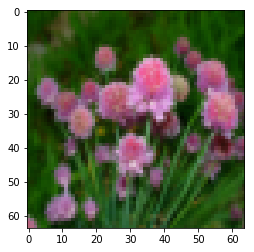

In [20]:
plt.imshow(train_set_x_orig[21])
print(train_set_y[:,21])

In [21]:
#-1表示剩余所有维数成为一列
train_set_x_testReshape=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
print(train_set_x_testReshape.shape)

(209, 12288)


In [22]:
train_num=train_set_x_orig.shape[0]   #训练集数目
train_set_x_flatten=train_set_x_orig.reshape(train_num,-1).T
train_set_x=train_set_x_flatten/255   #像素值为0-255
test_num=test_set_x_orig.shape[0]     #测试集数目
test_set_x_flatten=test_set_x_orig.reshape(test_num,-1).T
test_set_x=test_set_x_flatten/255

In [23]:
#定义sigmoid函数
def sigmoid(z):
    a=1.0/(1+1/np.exp(z))
    return a

In [24]:
print(sigmoid(np.array([0,2])))

[ 0.5         0.88079708]


In [25]:
#以0向量初始化参数
def initialize_parameter_with_zero(dim):
    w=np.zeros((dim,0))
    b=0
    return w,b

In [26]:
def propagation(w,b,X,Y):
    m=X.shape[1]   #训练集数目
    
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    
    cost=-1.0/m*np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    dw=1/m*np.dot(X,(A-Y).T)
    db=1/m*np.sum(A-Y)

    return cost,dw,db

In [27]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
cost,dw,db=propagation(w,b,X,Y)
print(cost)
print(dw)
print(db)


5.80154531939
[[ 0.99845601]
 [ 2.39507239]]
0.00145557813678


In [70]:
def optimize(w,b,X,Y,iteration_num,learning_rate,print_cost=False):
    
    costs=[]
    
    for i in range(iteration_num):
        cost,dw,db=propagation(w,b,X,Y)
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%100==0:
            costs.append(cost)
            
        if i%100==0 and print_cost==True:
            
            print(str(i)+' iteration num get cost '+str(cost))
            
    return costs,w,b,dw,db,cost

In [71]:
costs,w,b,dw,db,cost=optimize(w,b,X,Y,101,0.009,print_cost=True)
print(w)
print(b)
print(cost)

0 iteration num get cost 0.807735633771
100 iteration num get cost 0.716657987967
[[-0.08718203]
 [ 0.10848629]]
-0.14293382676
0.716657987967


In [72]:
def predict(w,b,X):
    
    num=X.shape[1]
    Y_prediction=np.zeros((1,num))
    
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(num):
        if A[0][i]<0.5:
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction        

In [73]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


In [74]:
def model(X_train,Y_train,X_test,Y_test,iteration_num=2000,learning_rate=0.5,print_cost=False):
    
    dim=X_train.shape[0]       #维度
    train_num=X_train.shape[1]     #训练集数目
    
    w=np.zeros((dim,1))     #初始化w，b
    b=0
    
    costs,w,b,dw,db,cost=optimize(w,b,X_train,Y_train,iteration_num,learning_rate,print_cost)       #logistic回归，训练w，b
        #测试参数w,b的效果
    train_Y_prediction=predict(w,b,X_train)
    train_correction=1-np.sum(np.abs(Y_train-train_Y_prediction))/train_num
    test_num=X_test.shape[1]
    test_Y_prediction=predict(w,b,X_test)
    test_correction=1-np.sum(np.abs(Y_test-test_Y_prediction))/test_num
    
    print('train set correction rate is '+str(train_correction))
    print('test set correction rate is '+str(test_correction))
    
    d={
        'costs':costs,
        'train_Y_prediction':train_Y_prediction,
        'test_Y_prediction':test_Y_prediction,
        'w':w,
        'b':b,
        'learning_rate':learning_rate,
        'iteration_num':iteration_num
    }
    return d
    

In [75]:
d=model(train_set_x,train_set_y,test_set_x,test_set_y,learning_rate=0.005,print_cost=True)

0 iteration num get cost 0.69314718056
100 iteration num get cost 0.584508363699
200 iteration num get cost 0.466949040947
300 iteration num get cost 0.376006866948
400 iteration num get cost 0.331463289328
500 iteration num get cost 0.303273067474
600 iteration num get cost 0.279879586583
700 iteration num get cost 0.260042136926
800 iteration num get cost 0.242940684678
900 iteration num get cost 0.228004222567
1000 iteration num get cost 0.214819513784
1100 iteration num get cost 0.203078190606
1200 iteration num get cost 0.192544277167
1300 iteration num get cost 0.183033337969
1400 iteration num get cost 0.174398594384
1500 iteration num get cost 0.166521397054
1600 iteration num get cost 0.159304518298
1700 iteration num get cost 0.152667324713
1800 iteration num get cost 0.14654223504
1900 iteration num get cost 0.140872075703
train set correction rate is 0.99043062201
test set correction rate is 0.7


[1]
[ 0.]


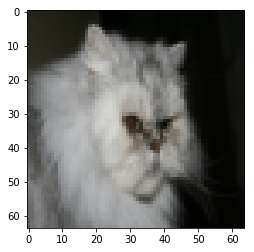

In [76]:
index=10
plt.imshow(test_set_x_orig[index])
print(test_set_y[:,index])
print(d['test_Y_prediction'][:,index])

In [77]:
print(test_set_x_orig[10])

[[[ 36  36  26]
  [ 35  35  27]
  [ 35  34  26]
  ..., 
  [ 11  13   8]
  [ 11  13   8]
  [  9  11   6]]

 [[ 37  36  27]
  [ 37  36  26]
  [ 36  35  26]
  ..., 
  [ 12  14   9]
  [ 11  13   8]
  [  9  11   6]]

 [[ 39  36  27]
  [ 39  36  27]
  [ 37  36  26]
  ..., 
  [ 12  14   9]
  [ 11  13   8]
  [  9  11   6]]

 ..., 
 [[ 94  94  93]
  [107 108 109]
  [120 122 123]
  ..., 
  [  4   5   0]
  [  4   5   0]
  [  6   7   2]]

 [[ 92  92  91]
  [112 113 114]
  [121 122 124]
  ..., 
  [  4   5   0]
  [  4   5   0]
  [  6   7   2]]

 [[ 88  88  87]
  [111 112 114]
  [119 120 122]
  ..., 
  [  3   5   0]
  [  4   5   0]
  [  5   6   1]]]


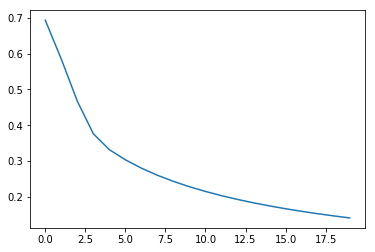

In [78]:
costs=d['costs']
plt.plot(costs)

In [79]:
print(d['costs'])

[0.69314718055994529, 0.58450836369930859, 0.46694904094655476, 0.37600686694802077, 0.33146328932825131, 0.30327306747438293, 0.27987958658260481, 0.26004213692587569, 0.2429406846779662, 0.22800422256726061, 0.2148195137844964, 0.20307819060644985, 0.19254427716706862, 0.18303333796883503, 0.17439859438448874, 0.16652139705400326, 0.15930451829756614, 0.15266732471296504, 0.14654223503982342, 0.14087207570310153]


In [80]:
learning_rate=[0.01,0.001,0.0001]
models=[]

for i in learning_rate:
    print('learning rate is '+str(i))
    models.append(model(train_set_x,train_set_y,test_set_x,test_set_y,learning_rate=i,print_cost=False))
    


learning rate is 0.01
train set correction rate is 0.995215311005
test set correction rate is 0.7
learning rate is 0.001
train set correction rate is 0.913875598086
test set correction rate is 0.68
learning rate is 0.0001
train set correction rate is 0.712918660287
test set correction rate is 0.4


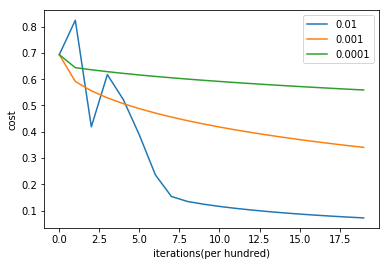

In [85]:
for i in range(len(learning_rate)):
    costs=models[i]['costs']
    learn=models[i]['learning_rate']
    plt.plot(costs,label=str(learn))
#     plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundred)')
plt.legend()
plt.show()